In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


data = np.loadtxt('train_1d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
xarray = data[...,0] # Need to get this on a matrix-form!
Y = data[...,1]
# print(data)
print(" ")




In [2]:
print(len(xarray))
print(len(Y))

325
325


In [3]:
# Need X on the form 1,x1. We only have one feature for this task.
X = np.ones((len(xarray), 2))
place = 0
for obs in xarray:
    # Put one obs in each place in X
    X[place,1] = obs
    place+=1


In [62]:
# Calculating the weigths for one feature:
Xtrans = np.transpose(X)

XtransDotX = np.dot(Xtrans,X)


# inverse of this result:
matrix1= np.matrix(XtransDotX)

# Inverse it
matrix1= matrix1.I

# Xtrans dotted with Y:

XtransDotY = np.dot(Xtrans,Y)

# Finally, to get w:
w = np.dot(matrix1,XtransDotY)
print(w)






[[0.1955866  0.61288795]]


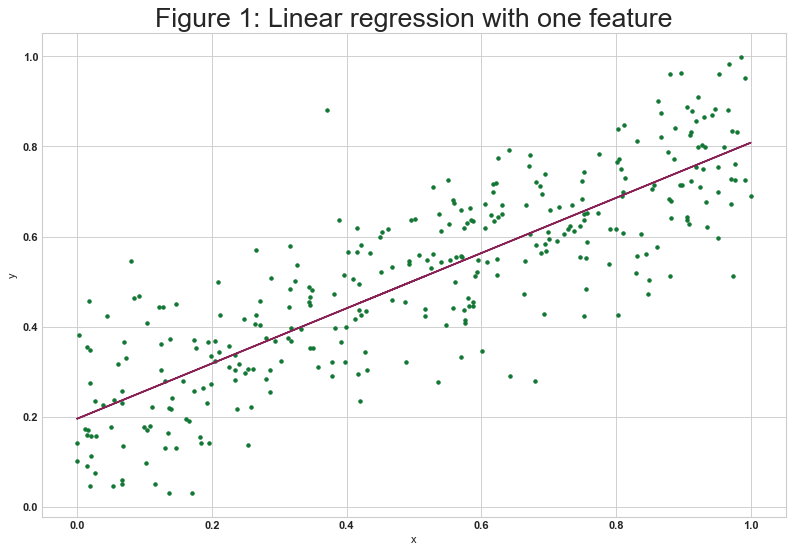

In [63]:
# plotting the given data:

plt.style.use('seaborn-whitegrid')

# Plotting function for model:
def f(x):
 return (w[0,0] + w[0,1]*x)
modelPoints = f(xarray)

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 1: Linear regression with one feature', size = 24)
plt.scatter(xarray, Y, marker='.',color='#117733')
plt.plot(xarray, modelPoints, color = "#882255")

plt.show()

# Results
The final hypothesis seems to be fitting the scatter plot well.

In [66]:
# **** Plotting my hypothesis **** : 


# Adding one at the start of the array (because of the bias)
xWithOne = np.insert(xarray,0,1)

# Putting the x-values into a matrix of one column.
xMatrix = np.reshape(xWithOne, (len(xWithOne), 1))
print(xMatrix)

wtrans = np.transpose(w)

#print(w)

h = np.dot(wtrans,xMatrix)

#print(np.matrix(xarray))

len(wtrans)


[[1.   ]
 [0.418]
 [0.722]
 [0.   ]
 [0.303]
 [0.147]
 [0.092]
 [0.187]
 [0.346]
 [0.398]
 [0.54 ]
 [0.42 ]
 [0.687]
 [0.205]
 [0.88 ]
 [0.027]
 [0.672]
 [0.418]
 [0.56 ]
 [0.141]
 [0.199]
 [0.803]
 [0.971]
 [0.314]
 [0.694]
 [0.879]
 [0.897]
 [0.085]
 [0.039]
 [0.17 ]
 [0.88 ]
 [0.099]
 [0.422]
 [0.96 ]
 [0.535]
 [0.694]
 [0.316]
 [0.688]
 [0.837]
 [0.018]
 [0.752]
 [0.992]
 [0.75 ]
 [0.281]
 [0.791]
 [0.103]
 [0.449]
 [0.911]
 [0.294]
 [0.288]
 [0.13 ]
 [0.019]
 [0.681]
 [0.212]
 [0.266]
 [0.493]
 [0.053]
 [0.576]
 [0.147]
 [0.591]
 [0.702]
 [0.103]
 [0.415]
 [0.696]
 [0.415]
 [0.05 ]
 [0.537]
 [0.666]
 [0.516]
 [0.947]
 [0.588]
 [0.906]
 [0.138]
 [0.14 ]
 [0.81 ]
 [0.399]
 [0.166]
 [0.93 ]
 [0.349]
 [0.753]
 [0.728]
 [0.886]
 [0.625]
 [0.753]
 [0.35 ]
 [0.271]
 [0.898]
 [0.429]
 [0.967]
 [0.665]
 [0.623]
 [0.115]
 [0.952]
 [0.451]
 [0.58 ]
 [0.409]
 [0.238]
 [0.906]
 [0.575]
 [0.003]
 [0.619]
 [0.327]
 [0.528]
 [0.888]
 [0.358]
 [0.911]
 [0.625]
 [0.016]
 [0.932]
 [0.693]
 [1.   ]
 

ValueError: shapes (2,1) and (326,1) not aligned: 1 (dim 1) != 326 (dim 0)